<h1>S04 T02: Graphical Visualization of Multiple Variables</h1>

<h2>Nivell 1</h2>

<h3>Exercici 1</h3>

In [141]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html
import dash_cytoscape as cyto
import plotly.express as px
import math
import matplotlib.image as mpimg
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

<h4>Data description</h4>

In [142]:
# Open the choosen file
tips = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S04/S04T02/tips.csv', sep=',', encoding='utf-8')

In [143]:
#Only the first 5 rows will be show
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
#shape of the DF
tips.shape

(244, 7)

In [145]:
#Array of the columns names of the DF
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [146]:
#this line will show the unique value of the column day, which represent the working days of the waiter
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [147]:
#To see if there is a NaN data
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [148]:
#Line to show the dtypes of the DF
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [149]:
#Describe the numeric values rounded to 3 decimals 
tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [150]:
#Describe the object values rounded to 3 decimals 
tips.describe(include=[object])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [151]:
#mean of the column tip
tips.tip.mean()

2.9982786885245902

<h4> Examining Numerical Data </h4>

<h5>Scatter plot</h5>

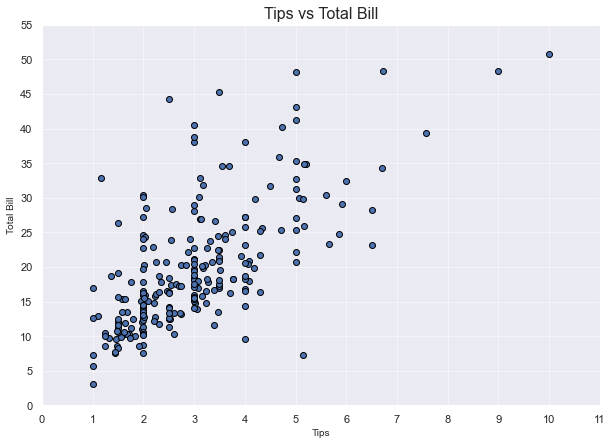

In [152]:
#Create data

x = tips.tip
y = tips.total_bill

colors = "blue"
area = np.pi*5


plt.figure(figsize=(10,7))


#Plot the data

days_tips = plt.scatter(x, y, edgecolors= "black")

plt.xlim([0,11])

plt.ylim([0,55])

plt.title("Tips vs Total Bill",size= 16)
plt.xlabel("Tips",size=10)
plt.ylabel("Total Bill",size=10)

ax = plt.gca()

ax.xaxis.set_major_locator(tck.MultipleLocator(1))
ax.xaxis.set_minor_locator(tck.MultipleLocator())

ax.yaxis.set_major_locator(tck.MultipleLocator(5))
ax.yaxis.set_minor_locator(tck.MultipleLocator(2.5))



plt.grid(True, alpha=.5)

plt.show()


In [153]:
fig = px.scatter(tips, x="total_bill", y="tip", color="day", facet_col="sex", facet_row="time")
fig.show()

In [154]:
fig = px.scatter(tips, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

<h5>Matrix plots</h5>

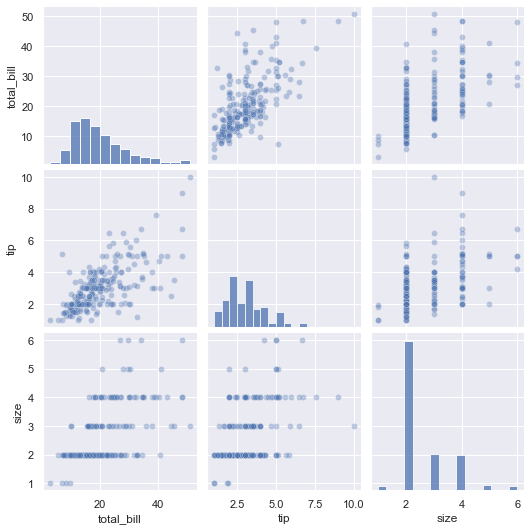

In [155]:
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.35})

In [156]:
fig = px.scatter_matrix(tips,
                       dimensions= ["total_bill","tip","size"],
                       color = "sex",
                       symbol = "sex",
                       title="Scatter matrix of Tips dataset")


fig.update_layout(width=1000,height=700)


fig.update_traces(marker=dict(size=6,
                              opacity=.5
                            ))


fig.show()

In [157]:
fig = px.scatter_matrix(tips,
                       dimensions= ["total_bill","tip","size"],
                       color = "sex",
                       symbol = "smoker",
                       title="Scatter matrix of Tips dataset")

fig.update_layout(width=1000,height=700)


fig.update_traces(marker=dict(size=6,
                              opacity=.5
                            ))

fig.show()

<h5>Histograms</h5>

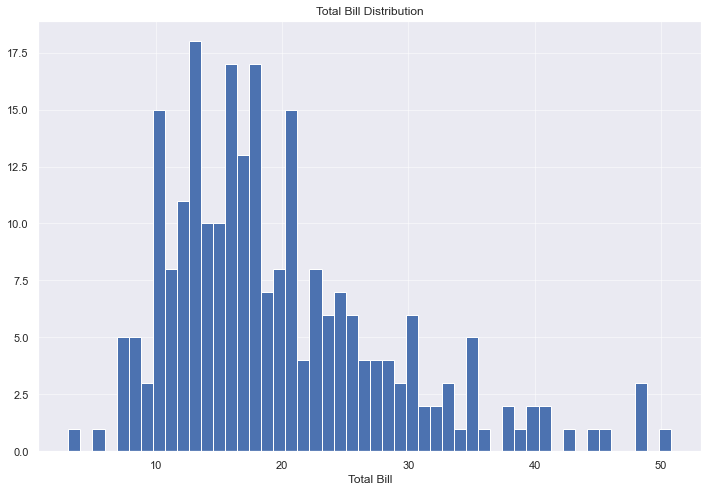

In [158]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(tips.total_bill, bins=50)
plt.grid(True, alpha=.5)

plt.title("Total Bill Distribution")
plt.xlabel('Total Bill')


ax = plt.gca()

ax.xaxis.set_major_locator(tck.MultipleLocator(10))
ax.xaxis.set_minor_locator(tck.MultipleLocator(5))

ax.yaxis.set_major_locator(tck.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(tck.MultipleLocator(1))


plt.tight_layout()

plt.show()

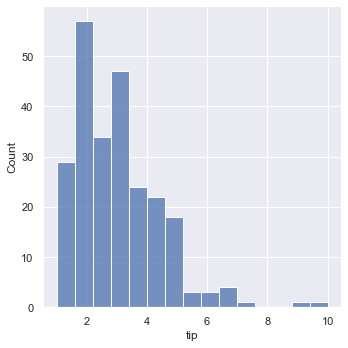

In [159]:
sns.displot(tips,x="tip",bins=15)

In [160]:
px.histogram(tips,x="day")

<h4>Summary Statistics</h4>

<h5>Average</h5>

In [161]:
tips.tip.mean()

2.9982786885245902

In [162]:
tips.tip.mean().round(3)

AttributeError: 'float' object has no attribute 'round'

<h5>Variance and Standard Deviation</h5>

In [163]:
tips.total_bill.mean()- tips.total_bill.std()

10.883530668093968

<h6>Variance</h6>

In [164]:
tips.total_bill.iloc[[1], ]

1    10.34
Name: total_bill, dtype: float64

<h6>Standard Deviation</h6>

In [165]:
tips.total_bill.std()

8.902411954856856

Text(0.5, 0, 'Total Bill')

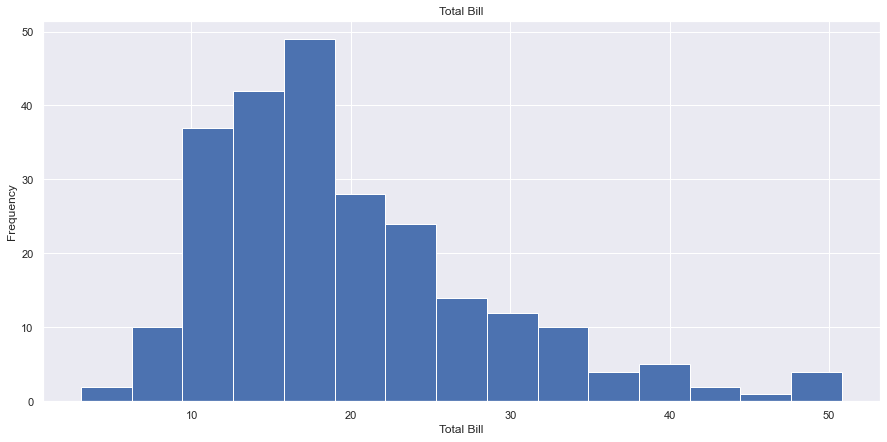

In [166]:
tips.hist(['total_bill'], bins=15)
plt.title('Total Bill')
plt.ylabel('Frequency')
plt.xlabel('Total Bill')

In [167]:
tips.total_bill.std()

8.902411954856856

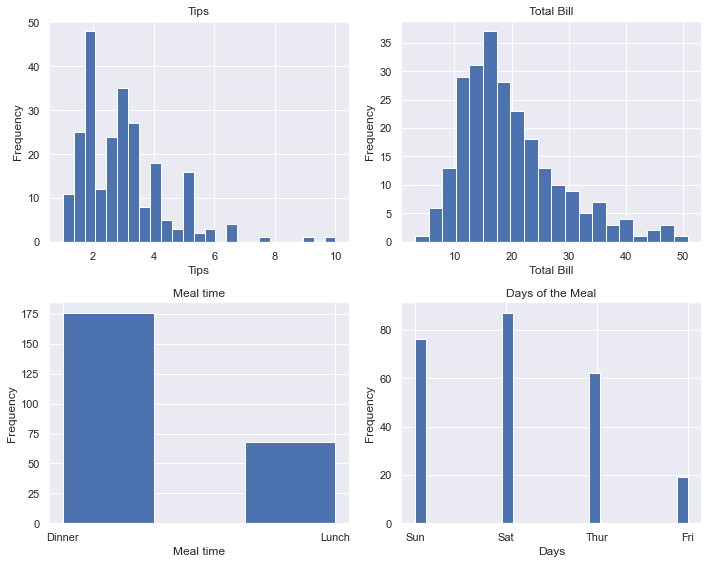

In [168]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(tips['tip'], bins=25)
plt.title('Tips')
plt.ylabel('Frequency')
plt.xlabel('Tips')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(tips['total_bill'], bins=20)

plt.title('Total Bill')
plt.ylabel('Frequency')
plt.xlabel('Total Bill')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(tips['time'], bins=3)
plt.title('Meal time')
plt.ylabel('Frequency')
plt.xlabel('Meal time')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(tips['day'], bins=25)

plt.title('Days of the Meal')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.tight_layout()

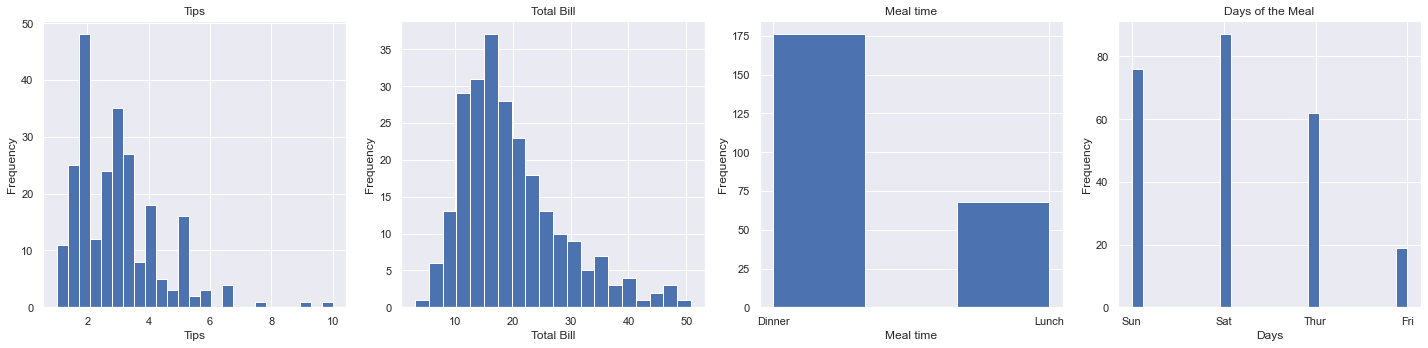

In [169]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1)

ax1.hist(tips['tip'], bins=25)
plt.title('Tips')
plt.ylabel('Frequency')
plt.xlabel('Tips')

ax2 = fig.add_subplot(1, 4, 2)

ax2.hist(tips['total_bill'], bins=20)

plt.title('Total Bill')
plt.ylabel('Frequency')
plt.xlabel('Total Bill')

ax3 = fig.add_subplot(1, 4, 3)

ax3.hist(tips['time'], bins=3)
plt.title('Meal time')
plt.ylabel('Frequency')
plt.xlabel('Meal time')

ax4 = fig.add_subplot(1, 4, 4)

ax4.hist(tips['day'], bins=25)

plt.title('Days of the Meal')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.tight_layout()

In [170]:
tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


<h4>Box Plot</h4>

In [171]:
tips.shape

(244, 7)

In [172]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [173]:
(tips['total_bill']).describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [174]:
(tips['total_bill']).median()

17.795

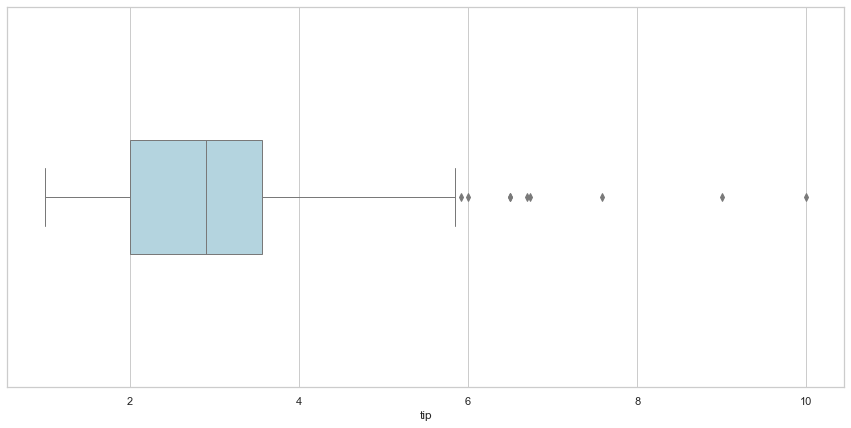

In [175]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips["tip"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='tip'>

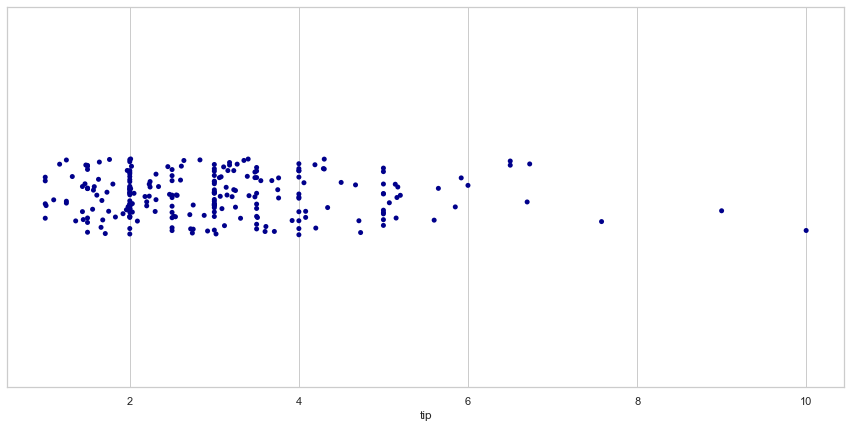

In [176]:
sns.stripplot(x=tips["tip"], orient='v', color='darkblue')

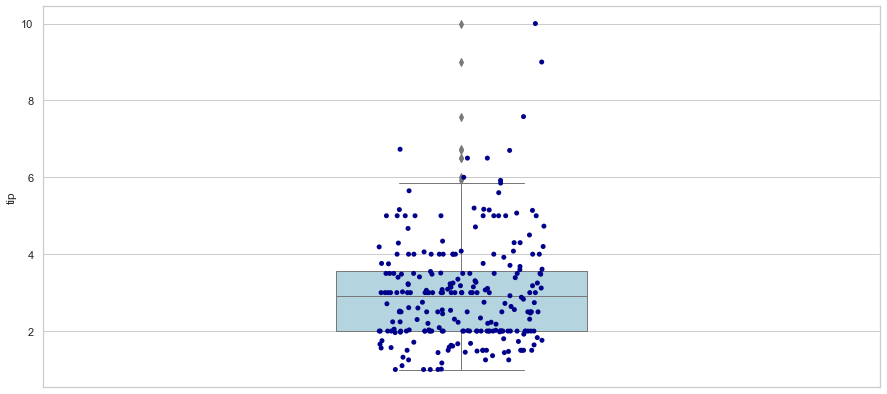

In [177]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue')

In [178]:
tips.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

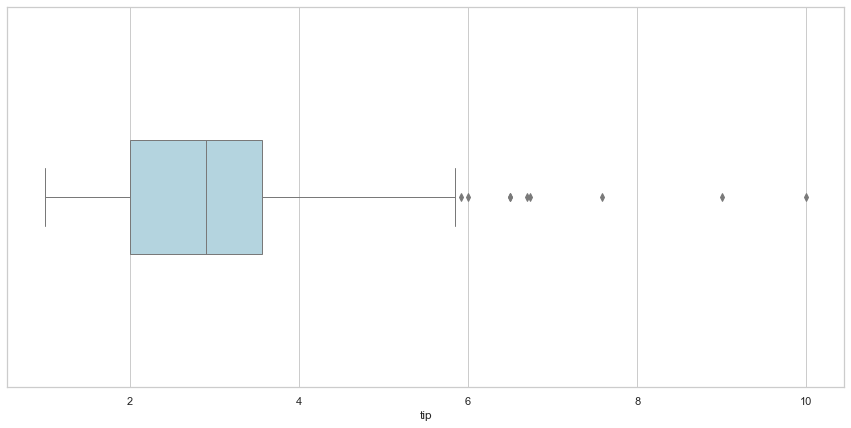

In [179]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips["tip"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='tip'>

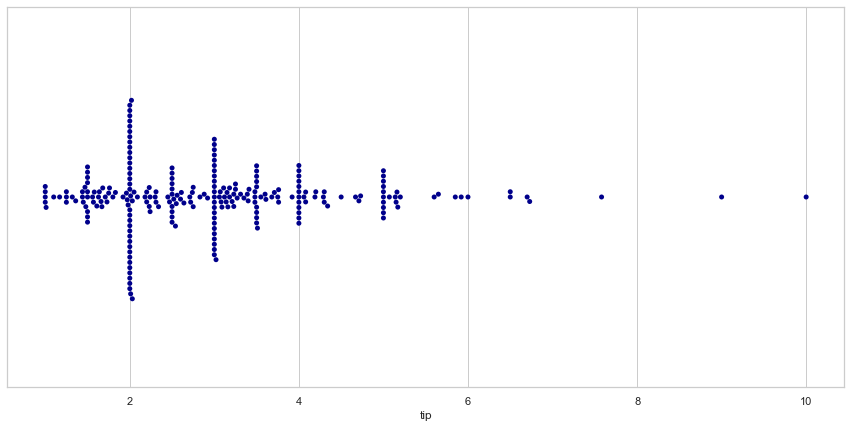

In [180]:
sns.swarmplot(x=tips["tip"], orient='v', color='darkblue')

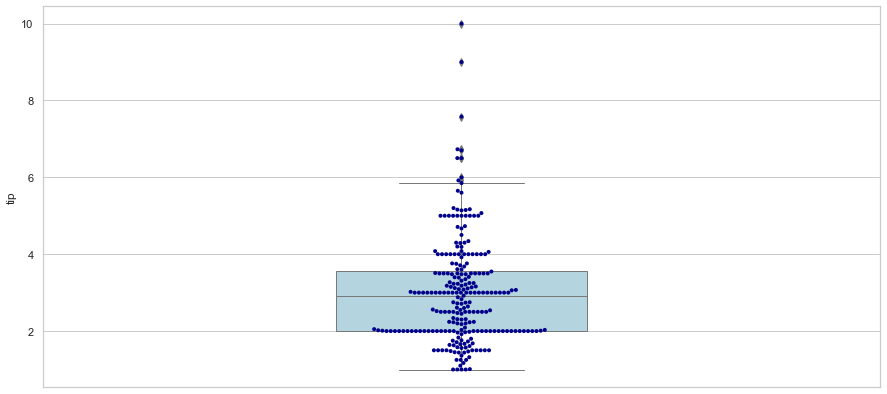

In [181]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="tip", data=tips, color="darkblue", orient="v", size=4)

<h2>Nivell 2 i Nivell 3</h4>

<h3>Exercici 1</h3>

<h4>Data description</h4>

In [182]:
#the file has an unknown encoding, this library hels to find the encoding

import chardet
file = '/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S04/S04T02/Data-Science/Pre-processing-data/movies.dat'
        
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [183]:
# Open the choosen file

movies_raw = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S04/S04T02/Data-Science/Pre-processing-data/movies.dat',header=None,encoding='ISO-8859-1',sep='::',engine='python')

#movies_raw = pd.read_csv(r'C:\Users\formacio\Documents\FRITDS\movies.dat',header=None,encoding='ISO-8859-1',sep='::',index_col=0,engine='python')

In [184]:
#Copy of the DF
movies= movies_raw.copy()
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [185]:
#To know of many genres have a movie, the | will be counted and added in a new column, 
#the he count is incomplete as the | is beetween genres, like a range, so +1 will be added to the original count 

movies["Num. Genre"] = movies[2].str.count('\\|')+1
movies

,0,1,2,Num. Genre
0,1,Toy Story (1995),Animation|Children's|Comedy,3
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,2
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,1
3879,3949,Requiem for a Dream (2000),Drama,1
3880,3950,Tigerland (2000),Drama,1
3881,3951,Two Family House (2000),Drama,1


In [186]:
#The genres of the movie are a unique string,the next line will split the genres by coluymns

sep_cat_movies = movies[2].str.split("|",expand=True)
separated_genre = sep_cat_movies.rename(columns={0:"Genre 1",1:"Genre 2",2:"Genre 3",3:"Genre 4",4:"Genre 5",5:"Genre 6"})
separated_genre

,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [187]:
#the name of the movie have the year of realease, so the next line will extract the year in a new colum

movies["year"] = movies[1].str.extract("\((\d.*?)\)")
movies

,0,1,2,Num. Genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,3,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,2,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,2,1995
4,5,Father of the Bride Part II (1995),Comedy,1,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,1,2000
3879,3949,Requiem for a Dream (2000),Drama,1,2000
3880,3950,Tigerland (2000),Drama,1,2000
3881,3951,Two Family House (2000),Drama,1,2000


In [188]:
#This line will extract the name of the movie in a new column

movies["Movie"] = movies[1].str.extract(r"^(.*?)\(\d", expand=True)
movies

,0,1,2,Num. Genre,year,Movie
0,1,Toy Story (1995),Animation|Children's|Comedy,3,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,2,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,2,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1,1995,Father of the Bride Part II
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,1,2000,Meet the Parents
3879,3949,Requiem for a Dream (2000),Drama,1,2000,Requiem for a Dream
3880,3950,Tigerland (2000),Drama,1,2000,Tigerland
3881,3951,Two Family House (2000),Drama,1,2000,Two Family House


In [189]:
#We will concat the differents DF
movies_category = pd.concat([movies,separated_genre],axis=1)
movies_category

,0,1,2,Num. Genre,year,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,Toy Story (1995),Animation|Children's|Comedy,3,1995,Toy Story,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3,1995,Jumanji,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,2,1995,Grumpier Old Men,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama,2,1995,Waiting to Exhale,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,1,1995,Father of the Bride Part II,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,1,2000,Meet the Parents,Comedy,None,None,None,None,None
3879,3949,Requiem for a Dream (2000),Drama,1,2000,Requiem for a Dream,Drama,None,None,None,None,None
3880,3950,Tigerland (2000),Drama,1,2000,Tigerland,Drama,None,None,None,None,None
3881,3951,Two Family House (2000),Drama,1,2000,Two Family House,Drama,None,None,None,None,None


In [190]:
#We will drop the unnecesary columns 

movies_categories = movies_category.drop(columns=[1,2])
movies_categories

,0,Num. Genre,year,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,3,1995,Toy Story,Animation,Children's,Comedy,None,None,None
1,2,3,1995,Jumanji,Adventure,Children's,Fantasy,None,None,None
2,3,2,1995,Grumpier Old Men,Comedy,Romance,None,None,None,None
3,4,2,1995,Waiting to Exhale,Comedy,Drama,None,None,None,None
4,5,1,1995,Father of the Bride Part II,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3878,3948,1,2000,Meet the Parents,Comedy,None,None,None,None,None
3879,3949,1,2000,Requiem for a Dream,Drama,None,None,None,None,None
3880,3950,1,2000,Tigerland,Drama,None,None,None,None,None
3881,3951,1,2000,Two Family House,Drama,None,None,None,None,None


In [191]:
movies_categories.isnull().sum()

0                0
Num. Genre       0
year             0
Movie            0
Genre 1          0
Genre 2       2025
Genre 3       3347
Genre 4       3768
Genre 5       3868
Genre 6       3882
dtype: int64

In [192]:
#The none value will be replaced with NaN

movies_and_genres = movies_categories.fillna(value=np.nan)
movies_and_genres

,0,Num. Genre,year,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,3,1995,Toy Story,Animation,Children's,Comedy,NaN,NaN,NaN
1,2,3,1995,Jumanji,Adventure,Children's,Fantasy,NaN,NaN,NaN
2,3,2,1995,Grumpier Old Men,Comedy,Romance,NaN,NaN,NaN,NaN
3,4,2,1995,Waiting to Exhale,Comedy,Drama,NaN,NaN,NaN,NaN
4,5,1,1995,Father of the Bride Part II,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3878,3948,1,2000,Meet the Parents,Comedy,NaN,NaN,NaN,NaN,NaN
3879,3949,1,2000,Requiem for a Dream,Drama,NaN,NaN,NaN,NaN,NaN
3880,3950,1,2000,Tigerland,Drama,NaN,NaN,NaN,NaN,NaN
3881,3951,1,2000,Two Family House,Drama,NaN,NaN,NaN,NaN,NaN


In [193]:
#This line will tell us how many values we have per column

not_nan_df = movies_and_genres.notna().sum()
not_nan_df

0             3883
Num. Genre    3883
year          3883
Movie         3883
Genre 1       3883
Genre 2       1858
Genre 3        536
Genre 4        115
Genre 5         15
Genre 6          1
dtype: int64

In [194]:
#select columns
df_movies_and_genres = movies_and_genres[["Movie","year",'Genre 1', 'Genre 2', 'Genre 3',
                                          'Genre 4', 'Genre 5',
                                          'Genre 6',"Num. Genre"]]
df_movies_and_genres

,Movie,year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Num. Genre
0,Toy Story,1995,Animation,Children's,Comedy,NaN,NaN,NaN,3
1,Jumanji,1995,Adventure,Children's,Fantasy,NaN,NaN,NaN,3
2,Grumpier Old Men,1995,Comedy,Romance,NaN,NaN,NaN,NaN,2
3,Waiting to Exhale,1995,Comedy,Drama,NaN,NaN,NaN,NaN,2
4,Father of the Bride Part II,1995,Comedy,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,2000,Comedy,NaN,NaN,NaN,NaN,NaN,1
3879,Requiem for a Dream,2000,Drama,NaN,NaN,NaN,NaN,NaN,1
3880,Tigerland,2000,Drama,NaN,NaN,NaN,NaN,NaN,1
3881,Two Family House,2000,Drama,NaN,NaN,NaN,NaN,NaN,1


In [195]:
#Sample of the DF, 15 random rows of the DF
df_movies_and_genres.sample(n=15)

,Movie,year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Num. Genre
3650,Love's Labour's Lost,2000,Comedy,Romance,NaN,NaN,NaN,NaN,2
2348,Heartburn,1986,Comedy,Drama,NaN,NaN,NaN,NaN,2
3352,Animal House,1978,Comedy,NaN,NaN,NaN,NaN,NaN,1
3259,Ghost Dog: The Way of the Samurai,1999,Crime,Drama,NaN,NaN,NaN,NaN,2
1574,"Peacemaker, The",1997,Action,Thriller,War,NaN,NaN,NaN,3
1234,"Treasure of the Sierra Madre, The",1948,Adventure,NaN,NaN,NaN,NaN,NaN,1
1642,Anastasia,1997,Animation,Children's,Musical,NaN,NaN,NaN,3
1581,"Thousand Acres, A",1997,Drama,NaN,NaN,NaN,NaN,NaN,1
2237,Holy Man,1998,Comedy,NaN,NaN,NaN,NaN,NaN,1
3038,Backdraft,1991,Action,Drama,NaN,NaN,NaN,NaN,2


In [196]:
#we will have 9 columns and 3883 rows 
df_movies_and_genres.shape

(3883, 9)

In [197]:
#Describe of the df with only numeric values
df_movies_and_genres.describe(include=[np.number])

,Num. Genre
count,3883.000000
mean,1.650270
std,0.804589
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [198]:
#Describe of the df with only object values
df_movies_and_genres.describe(include=[object])

,Movie,year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
count,3883,3883,3883,1858,536,115,15,1
unique,3841,81,18,17,15,13,6,1
top,Hamlet,1996,Drama,Drama,Thriller,Thriller,Thriller,War
freq,5,345,1176,381,120,40,3,1


In [199]:
#columns names of the DF
df_movies_and_genres.columns

Index(['Movie', 'year', 'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5',
       'Genre 6', 'Num. Genre'],
      dtype='object')

In [200]:
#Types of the data, the columns year is a object we will change it
df_movies_and_genres.dtypes

Movie         object
year          object
Genre 1       object
Genre 2       object
Genre 3       object
Genre 4       object
Genre 5       object
Genre 6       object
Num. Genre     int64
dtype: object

In [201]:
#The intention is to verify that the values correspond to "year" and not to a string 
movies_and_genres["year"].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [202]:
#Convert the string to numeric
movies_and_genres["Year"] = pd.to_numeric(movies_and_genres["year"])
movies_and_genres

,0,Num. Genre,year,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Year
0,1,3,1995,Toy Story,Animation,Children's,Comedy,NaN,NaN,NaN,1995
1,2,3,1995,Jumanji,Adventure,Children's,Fantasy,NaN,NaN,NaN,1995
2,3,2,1995,Grumpier Old Men,Comedy,Romance,NaN,NaN,NaN,NaN,1995
3,4,2,1995,Waiting to Exhale,Comedy,Drama,NaN,NaN,NaN,NaN,1995
4,5,1,1995,Father of the Bride Part II,Comedy,NaN,NaN,NaN,NaN,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,1,2000,Meet the Parents,Comedy,NaN,NaN,NaN,NaN,NaN,2000
3879,3949,1,2000,Requiem for a Dream,Drama,NaN,NaN,NaN,NaN,NaN,2000
3880,3950,1,2000,Tigerland,Drama,NaN,NaN,NaN,NaN,NaN,2000
3881,3951,1,2000,Two Family House,Drama,NaN,NaN,NaN,NaN,NaN,2000


In [203]:
#select the columns 
df_movie = movies_and_genres[["Movie","Year","Genre 1","Genre 2",
                              "Genre 3","Genre 4","Genre 5","Genre 6","Num. Genre"]]
df_movie

,Movie,Year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Num. Genre
0,Toy Story,1995,Animation,Children's,Comedy,NaN,NaN,NaN,3
1,Jumanji,1995,Adventure,Children's,Fantasy,NaN,NaN,NaN,3
2,Grumpier Old Men,1995,Comedy,Romance,NaN,NaN,NaN,NaN,2
3,Waiting to Exhale,1995,Comedy,Drama,NaN,NaN,NaN,NaN,2
4,Father of the Bride Part II,1995,Comedy,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,2000,Comedy,NaN,NaN,NaN,NaN,NaN,1
3879,Requiem for a Dream,2000,Drama,NaN,NaN,NaN,NaN,NaN,1
3880,Tigerland,2000,Drama,NaN,NaN,NaN,NaN,NaN,1
3881,Two Family House,2000,Drama,NaN,NaN,NaN,NaN,NaN,1


In [204]:
#verifiying the columns year
df_movie.dtypes

Movie         object
Year           int64
Genre 1       object
Genre 2       object
Genre 3       object
Genre 4       object
Genre 5       object
Genre 6       object
Num. Genre     int64
dtype: object

In [205]:
#This functions will return the unique values of movie genre by column
def uniques_genre(df,col):
    return df[col].unique()  

#This functions will return the count of genre by column
def uniques_count_genre(df,col):
    return df[col].nunique()

In [206]:
#Genres by column

columns_genre = ["Genre 1","Genre 2","Genre 3","Genre 4","Genre 5","Genre 6"]

lista_genero = []
for col in columns_genre:
    print(col,":")
    print(uniques_genre(df_movie,col))

Genre 1 :
['Animation' 'Adventure' 'Comedy' 'Action' 'Drama' 'Thriller' 'Crime'
 'Romance' "Children's" 'Documentary' 'Sci-Fi' 'Horror' 'Western'
 'Mystery' 'Film-Noir' 'War' 'Fantasy' 'Musical']
Genre 2 :
["Children's" 'Romance' 'Drama' nan 'Crime' 'Adventure' 'Horror'
 'Thriller' 'Comedy' 'Sci-Fi' 'War' 'Mystery' 'Musical' 'Film-Noir'
 'Fantasy' 'Western' 'Animation' 'Documentary']
Genre 3 :
['Comedy' 'Fantasy' nan 'Thriller' 'Romance' 'Drama' 'Musical' 'Crime'
 'War' 'Mystery' 'Sci-Fi' 'Western' 'Horror' "Children's" 'Animation'
 'Film-Noir']
Genre 4 :
[nan 'Romance' 'Horror' 'Musical' 'Crime' 'Sci-Fi' 'Thriller' 'Fantasy'
 'Western' "Children's" 'Drama' 'Comedy' 'War' 'Mystery']
Genre 5 :
[nan 'Thriller' 'Romance' 'Fantasy' 'Sci-Fi' 'War' 'Musical']
Genre 6 :
[nan 'War']


In [207]:
#Num. of genres by column
for col in columns_genre:
    print(col,":")
    print(uniques_count_genre(df_movie,col))

Genre 1 :
18
Genre 2 :
17
Genre 3 :
15
Genre 4 :
13
Genre 5 :
6
Genre 6 :
1


In [208]:
# Mode by genre columns 
for col in columns_genre:
    print(col,":")
    print(df_movie[col].mode())

Genre 1 :
0    Drama
dtype: object
Genre 2 :
0    Drama
dtype: object
Genre 3 :
0    Thriller
dtype: object
Genre 4 :
0    Thriller
dtype: object
Genre 5 :
0     Romance
1      Sci-Fi
2    Thriller
3         War
dtype: object
Genre 6 :
0    War
dtype: object


<h4> Examining Numerical Data </h4>

<h5> Density Plot </h5>

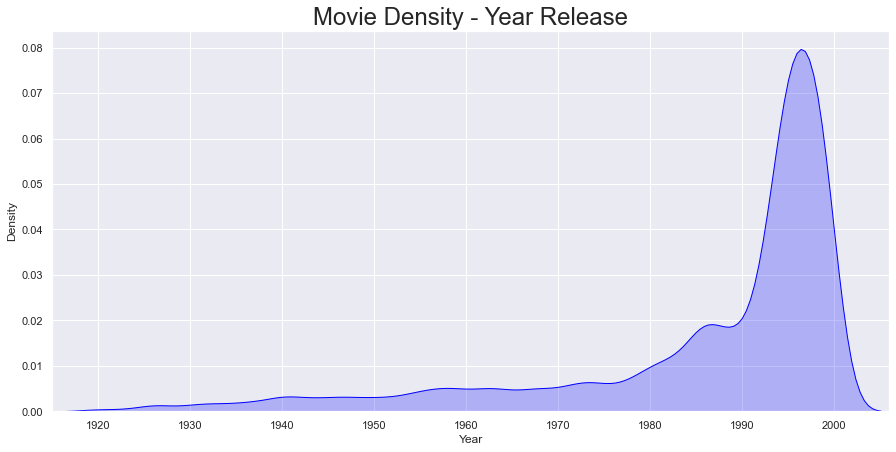

In [209]:
sns.set(rc={"figure.figsize":(15,7)})

movies_k =  sns.kdeplot(df_movie["Year"],shade=True,bw=.10,color="blue")
movies_k.set_xlim(1915,2006)
plt.title("Movie Density - Year Release",size=24)

ax = plt.gca()
ax.xaxis.set_major_locator(tck.MultipleLocator(10))

plt.show()

The density plot show that most of the movies were released in the 90's, the mid 70's was the  when the movie industry was starting to grow.  

<h5> Histogram </h5>

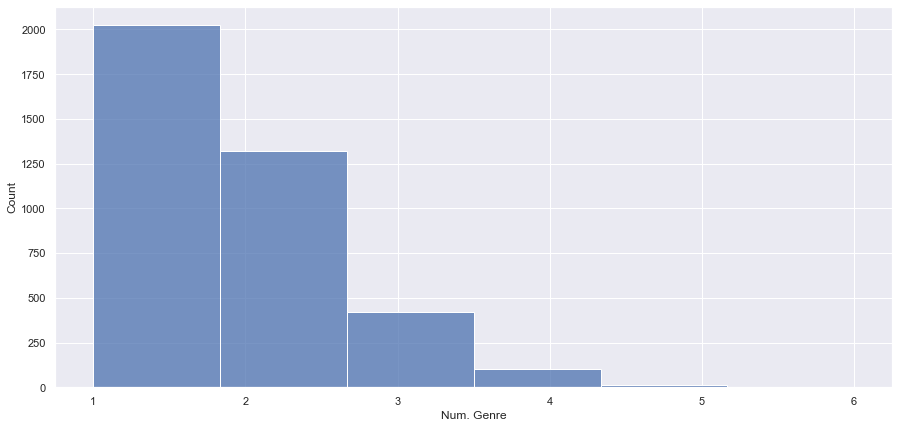

In [210]:
sns.histplot(data=df_movie,x="Num. Genre", bins=6)
plt.show()

This histogram show us that the number of genres by movie decrease and mostly the movies have 1-2 genres, about 10% of the movies have 3 or more genres, and, only one movie have 6 genres.

<h5> Movie Genres Network </h5>

In [211]:
#We will need the list of genres
id_genre = uniques_genre(df_movie,"Genre 1").tolist()
id_genre

['Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Drama',
 'Thriller',
 'Crime',
 'Romance',
 "Children's",
 'Documentary',
 'Sci-Fi',
 'Horror',
 'Western',
 'Mystery',
 'Film-Noir',
 'War',
 'Fantasy',
 'Musical']

In [212]:
#This list are the Sources (s) and Target (t) list
columns_s = ['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5']
columns_t = ['Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6']

In [213]:
#The NaN is a problem, from column 3-6 the valid value is less than the NaN and fill the NaN
#will cause more problems so a dummy value will be used and ignored in latter steps.
df_sources_targets = df_movie.fillna("dummy")
df_sources_targets

,Movie,Year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Num. Genre
0,Toy Story,1995,Animation,Children's,Comedy,dummy,dummy,dummy,3
1,Jumanji,1995,Adventure,Children's,Fantasy,dummy,dummy,dummy,3
2,Grumpier Old Men,1995,Comedy,Romance,dummy,dummy,dummy,dummy,2
3,Waiting to Exhale,1995,Comedy,Drama,dummy,dummy,dummy,dummy,2
4,Father of the Bride Part II,1995,Comedy,dummy,dummy,dummy,dummy,dummy,1
...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,2000,Comedy,dummy,dummy,dummy,dummy,dummy,1
3879,Requiem for a Dream,2000,Drama,dummy,dummy,dummy,dummy,dummy,1
3880,Tigerland,2000,Drama,dummy,dummy,dummy,dummy,dummy,1
3881,Two Family House,2000,Drama,dummy,dummy,dummy,dummy,dummy,1


In [214]:
#We will need the index of the DF in a list
list_index = df_sources_targets.index.values.tolist()

In [215]:
#The Dash library will show us the genres network in a circular arrange, this will permit 
#interactuate with the genres (nodes) and the relation between genres in a movie (edges)

app = dash.Dash(__name__)

nodes = [
    {
        'data': {'id': short, 'label': short}
    }
    for short in id_genre
]


edges = [
    
    {'data': {'source': df_sources_targets[source].iloc[row], 
              'target': df_sources_targets[target].iloc[row]}}
    
for source,target in zip(columns_s,columns_t)
for row in list_index
  
]

    

elements = nodes + edges

app.layout = html.Div([
    cyto.Cytoscape(
        id="movie-network",
        elements=elements,
        style={'width':'100%', 'height': "700px"},
         layout={
            'name': 'circle',
            'radius': 250,
            'startAngle': math.pi*1/6,
            'sweep': math.pi *2
        }
        
    )
        
])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


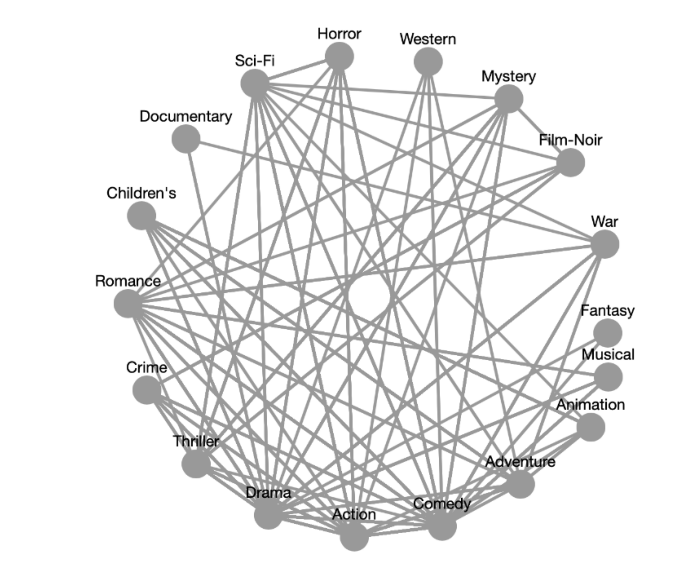

In [216]:
#This image is genre network

plt.figure(figsize=(12,12))

fig = mpimg.imread("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S04/S04T02/network_dash.png")
plt.axis(False)
plt.imshow(fig)

The image show us that the most genre interaction are Thiller, Drama, Action, Comedy and Adventure. Drama is the genre with most relation with other genre. Documentary, Fantasy are the genres with less interaction with other genres. 

<h5> Distribution of genres </h5>

In [217]:
#Creamos una lista con el número de generos por columna
dis_genres_column = []
for col in columns_genre:
    list_genres_uniques = uniques_count_genre(df_movie,col)
    dis_genres_column.append(list_genres_uniques)

dis_genres_column

[18, 17, 15, 13, 6, 1]

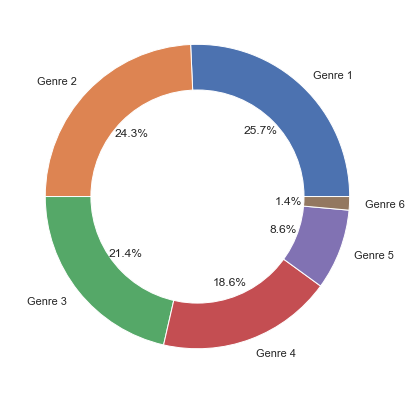

In [218]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(dis_genres_column,labels=columns_genre,autopct="%.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Doughnut plot to show the distribution of genres by column 90% of the movies has 4 genres.

<h5> Correlation of movies and genres by year </h5>

In [219]:
year_genre = df_movie.groupby("Year").count()
df_year_genres = year_genre[["Movie","Genre 1","Genre 2","Genre 3","Genre 4","Genre 5","Genre 6"]]
df_year_genres

,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
Year,,,,,,,
1919,3,3,2,0,0,0,0
1920,2,2,0,0,0,0,0
1921,1,1,0,0,0,0,0
1922,2,2,0,0,0,0,0
1923,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...
1996,345,345,148,38,8,2,0
1997,315,315,161,48,15,1,0
1998,337,337,171,53,10,1,0


In [220]:
df_year_genres.corr()

,Movie,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
Movie,1.000000,1.000000,0.994522,0.961461,0.858156,0.573844,0.077115
Genre 1,1.000000,1.000000,0.994522,0.961461,0.858156,0.573844,0.077115
Genre 2,0.994522,0.994522,1.000000,0.975092,0.876025,0.563305,0.095927
Genre 3,0.961461,0.961461,0.975092,1.000000,0.917319,0.603429,0.137244
Genre 4,0.858156,0.858156,0.876025,0.917319,1.000000,0.652440,0.068444
Genre 5,0.573844,0.573844,0.563305,0.603429,0.652440,1.000000,0.192068
Genre 6,0.077115,0.077115,0.095927,0.137244,0.068444,0.192068,1.000000


<AxesSubplot:>

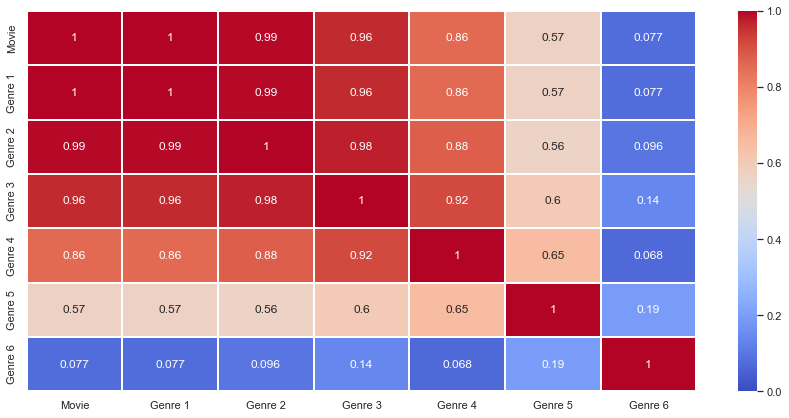

In [221]:
sns.heatmap(df_year_genres.corr(), vmin= 0,vmax= 1,annot= True,linewidths= .4,cmap= "coolwarm")

The heatmap will show us the correlation bewteen the matrix and the genres, as show in the plot, every movie has a genre, a few movies haven't a second and third genre. The fourth, fith and sixth fall dramatically.

<h5> Treemap of the genres in DF </h5>

In [222]:
lgenres = uniques_genre(df_movie,"Genre 1")
list_genres= lgenres.tolist()
list_genres

['Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Drama',
 'Thriller',
 'Crime',
 'Romance',
 "Children's",
 'Documentary',
 'Sci-Fi',
 'Horror',
 'Western',
 'Mystery',
 'Film-Noir',
 'War',
 'Fantasy',
 'Musical']

In [223]:
count_genres = []

for c in columns_genre:
    for g in list_genres:
        print(g,c)
        count = df_movie[c].str.count(g).sum()
        count_genres.append([g,c,count])

Animation Genre 1
Adventure Genre 1
Comedy Genre 1
Action Genre 1
Drama Genre 1
Thriller Genre 1
Crime Genre 1
Romance Genre 1
Children's Genre 1
Documentary Genre 1
Sci-Fi Genre 1
Horror Genre 1
Western Genre 1
Mystery Genre 1
Film-Noir Genre 1
War Genre 1
Fantasy Genre 1
Musical Genre 1
Animation Genre 2
Adventure Genre 2
Comedy Genre 2
Action Genre 2
Drama Genre 2
Thriller Genre 2
Crime Genre 2
Romance Genre 2
Children's Genre 2
Documentary Genre 2
Sci-Fi Genre 2
Horror Genre 2
Western Genre 2
Mystery Genre 2
Film-Noir Genre 2
War Genre 2
Fantasy Genre 2
Musical Genre 2
Animation Genre 3
Adventure Genre 3
Comedy Genre 3
Action Genre 3
Drama Genre 3
Thriller Genre 3
Crime Genre 3
Romance Genre 3
Children's Genre 3
Documentary Genre 3
Sci-Fi Genre 3
Horror Genre 3
Western Genre 3
Mystery Genre 3
Film-Noir Genre 3
War Genre 3
Fantasy Genre 3
Musical Genre 3
Animation Genre 4
Adventure Genre 4
Comedy Genre 4
Action Genre 4
Drama Genre 4
Thriller Genre 4
Crime Genre 4
Romance Genre 4
Chi

In [224]:
df_count_genres = pd.DataFrame(count_genres,columns=["Genre","Col Genre","Value"])
genres_count = df_count_genres.groupby("Genre").sum()
new_genres_count = genres_count.reset_index()
new_genres_count

,Genre,Value
0,Action,503.0
1,Adventure,283.0
2,Animation,105.0
3,Children's,251.0
4,Comedy,1200.0
5,Crime,211.0
6,Documentary,127.0
7,Drama,1603.0
8,Fantasy,68.0
9,Film-Noir,44.0


In [225]:
fig = px.treemap(new_genres_count, path=["Genre"],values="Value") 
fig.show()

This plot show us which genre appeared often in the movies, Drama is the first and Film-noir is the last. The order is based in the count of the genres.

<h5> boxplot of the genres by year </h5>

In [226]:
columns_genre = ["Genre 1","Genre 2","Genre 3","Genre 4","Genre 5","Genre 6"]
lista_g_1 = []
lista_g_2 = []
lista_g_3 = []
lista_g_4 = []
lista_g_5 = []
lista_g_6 = []
lista_columns_genre = [lista_g_1,lista_g_2,lista_g_3,lista_g_4,lista_g_5,lista_g_6]


lista_genero = []
for col,v in zip(columns_genre,lista_columns_genre):
    lg = df_movie[col].unique()
    v.append(lg)

In [227]:
df_l1 = pd.DataFrame(lista_g_1)
df_l2 = pd.DataFrame(lista_g_2)
df_l3 = pd.DataFrame(lista_g_3)
df_l4 = pd.DataFrame(lista_g_4)
df_l5 = pd.DataFrame(lista_g_5)
df_l6 = pd.DataFrame(lista_g_6)

df_lista_genres = pd.concat([df_l1,df_l2,df_l3,df_l4,df_l5,df_l6])
d_df_lista_genres = df_lista_genres.reset_index(drop=True)
df_lista_g_t = d_df_lista_genres.T
df_lista_g_t 

,0,1,2,3,4,5
0,Animation,Children's,Comedy,NaN,NaN,NaN
1,Adventure,Romance,Fantasy,Romance,Thriller,War
2,Comedy,Drama,NaN,Horror,Romance,NaN
3,Action,NaN,Thriller,Musical,Fantasy,NaN
4,Drama,Crime,Romance,Crime,Sci-Fi,NaN
5,Thriller,Adventure,Drama,Sci-Fi,War,NaN
6,Crime,Horror,Musical,Thriller,Musical,NaN
7,Romance,Thriller,Crime,Fantasy,NaN,NaN
8,Children's,Comedy,War,Western,NaN,NaN
9,Documentary,Sci-Fi,Mystery,Children's,NaN,NaN


In [228]:
d_l_1= df_lista_g_t[0].dropna()
d_l_2= df_lista_g_t[1].dropna()
d_l_3= df_lista_g_t[2].dropna()
d_l_4= df_lista_g_t[3].dropna()
d_l_5= df_lista_g_t[4].dropna()
d_l_6= df_lista_g_t[5].dropna()

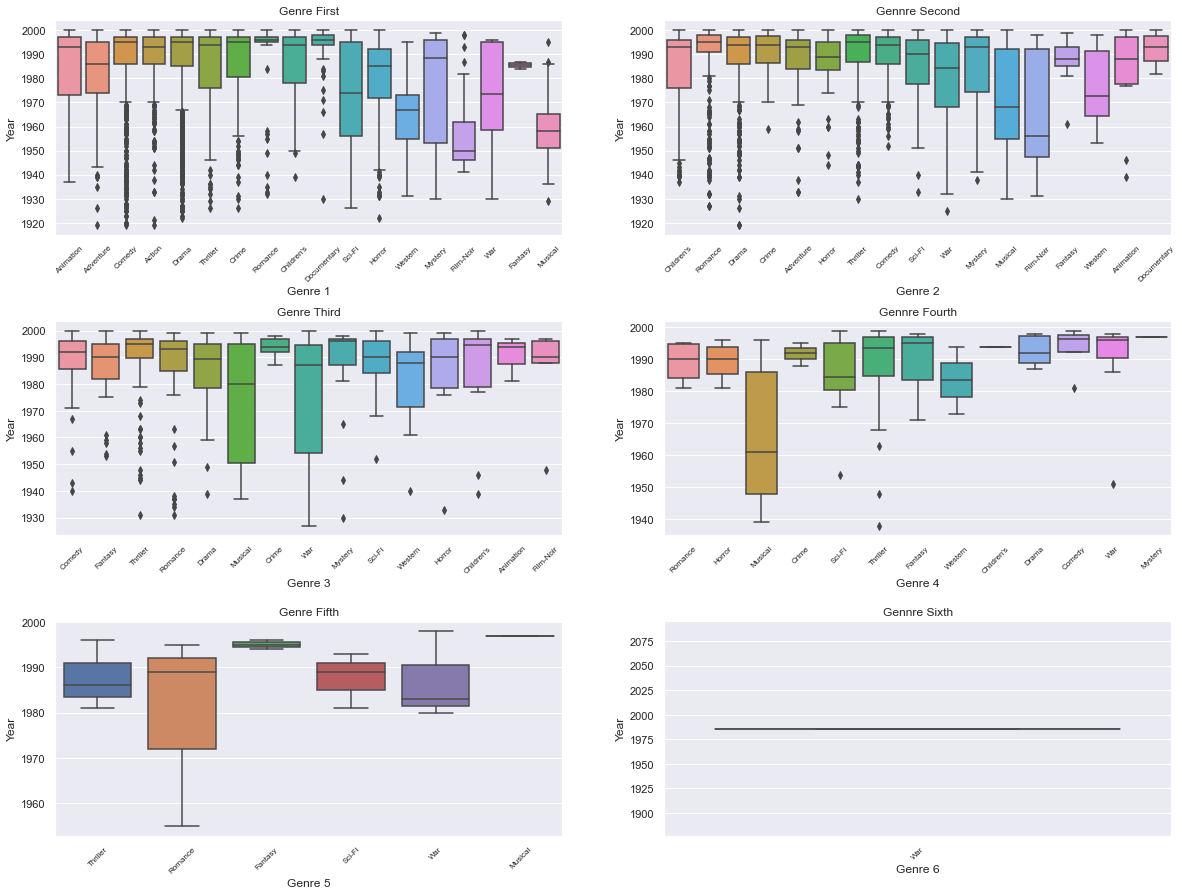

In [229]:
fig, axes = plt.subplots(3, 2,figsize=(20,15))

sns.boxplot(x='Genre 1', y='Year', data=df_movie, ax = axes[0,0])
sns.boxplot(x='Genre 2', y='Year', data=df_movie, ax = axes[0,1])
sns.boxplot(x='Genre 3', y='Year', data=df_movie, ax = axes[1,0])
sns.boxplot(x='Genre 4', y='Year', data=df_movie, ax = axes[1,1])
sns.boxplot(x='Genre 5', y='Year', data=df_movie, ax = axes[2,0])
sns.boxplot(x='Genre 6', y='Year', data=df_movie, ax = axes[2,1])

axes[0,0].set_title("Genre First")
axes[0,1].set_title("Gennre Second")
axes[1,0].set_title("Genre Third")
axes[1,1].set_title("Gennre Fourth")
axes[2,0].set_title("Genre Fifth")
axes[2,1].set_title("Gennre Sixth")

axes[0,0].set_xticklabels(d_l_1,rotation=45, fontsize=8)
axes[0,1].set_xticklabels(d_l_2,rotation=45, fontsize=8)
axes[1,0].set_xticklabels(d_l_3,rotation=45, fontsize=8)
axes[1,1].set_xticklabels(d_l_4,rotation=45, fontsize=8)
axes[2,0].set_xticklabels(d_l_5,rotation=45, fontsize=8)
axes[2,1].set_xticklabels(d_l_6,rotation=45, fontsize=8)

fig.subplots_adjust(hspace=0.4)


This plot will show the boxplot by year of the genres.

<h5>Movie Word Cloud</h5>

In [230]:
part_movie = df_movie[df_movie['Movie'].str.contains("II" or "III" or "IV" or "V" or "VI")]
part_movie

,Movie,Year,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Num. Genre
4,Father of the Bride Part II,1995,Comedy,NaN,NaN,NaN,NaN,NaN,1
40,Richard III,1995,Drama,War,NaN,NaN,NaN,NaN,2
124,"NeverEnding Story III, The",1994,Adventure,Children's,Fantasy,NaN,NaN,NaN,3
288,Poison Ivy II,1995,Thriller,NaN,NaN,NaN,NaN,NaN,1
401,Highlander III: The Sorcerer,1994,Action,Sci-Fi,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
3848,Hellbound: Hellraiser II,1988,Horror,NaN,NaN,NaN,NaN,NaN,1
3849,Hellraiser III: Hell on Earth,1992,Horror,NaN,NaN,NaN,NaN,NaN,1
3869,"Slumber Party Massacre II, The",1987,Horror,NaN,NaN,NaN,NaN,NaN,1
3870,"Slumber Party Massacre III, The",1990,Horror,NaN,NaN,NaN,NaN,NaN,1


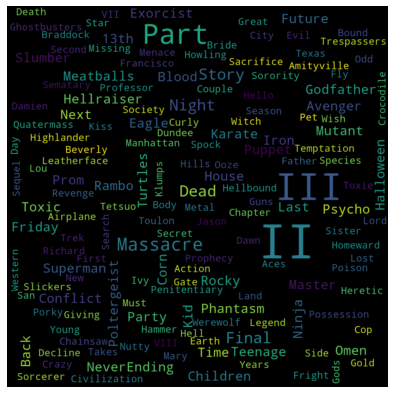

In [231]:
# Create a list of word
text= (' '.join(part_movie['Movie']))

# Create the wordcloud object
wordcloud = WordCloud(width=1200, height=1200, max_font_size=150, min_font_size=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

This plot will show us the words more frecuent in a movie series.